In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import time
from matplotlib.collections import PatchCollection
%matplotlib inline

In [196]:
viewingDistance = 100
radius = 10
speed = 40#1
dotNum = 500
timePoints = 1300#1000
pixelsPerDegree = 10 

In [3]:
# function to generate random dot positions at specified distance range from center
def getNewDotPositions(dotNum, minDist=5*pixelsPerDegree, maxDist=90*pixelsPerDegree):
    dists = np.random.uniform(minDist, maxDist, size=dotNum)
    angles = np.pi * np.random.uniform(0, 2, size=dotNum)
    x = dists * np.cos(angles)
    y = dists * np.sin(angles)
    return np.stack([x,y]).T

In [145]:
#pick dots at random screen positions with respect to center point
centerPos=np.array([-60*pixelsPerDegree,-20*pixelsPerDegree])
pos = getNewDotPositions(dotNum) + centerPos


In [216]:
np.random.randint(0,high=dotNum, size=dotNum/10)

array([394, 482, 414, 123, 247, 275, 383, 186, 386, 440,  78, 496, 240,
        13, 193, 428,  44, 300, 351, 490,  20, 303, 240, 431, 233, 164,
        89, 470, 347, 408, 131, 127, 307, 428, 373,  89, 143, 337,  16,
       317, 193,  38, 220,  38, 223,  96, 314, 223, 137, 294])

In [217]:
#trying different method
posArray = np.empty((timePoints, dotNum, 2))
posArray[0,:,:] = pos
for i in range(1,timePoints):
    posArray[i,:,0] = posArray[i-1,:,0] + speed*pixelsPerDegree*1/60.
    posArray[i,:,1] = posArray[i-1,:,1]
    #random repopulate 10% anywhere
    repopInds = np.random.randint(0,high=dotNum, size=dotNum/10)
    posArray[i,repopInds,:] = getNewDotPositions(len(repopInds)) + centerPos
    #replace dots that run off the monitor 
    #TODO: need to bias repopulation to the left side of the monitor
    if any(np.abs(posArray[i,:,0])>700):
        repopInds = np.where(np.abs(posArray[i,:,0])>700)[0]
        posArray[i,repopInds,:] = getNewDotPositions(len(repopInds)) + centerPos
        
        
        

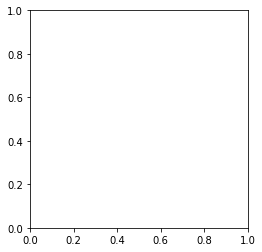

A Jupyter Widget

In [219]:
from ipywidgets import widgets, interact, interactive
from IPython.display import display
from IPython.display import Image

scaleFactor = 1/20.
fig, ax = plt.subplots()
ax.set_aspect('equal')
def f(x=0):
    patches = []
    for p in posArray[x]:
#         dist = ((p[0] - centerPos[0])**2 + (p[1]-centerPos[1])**2)**0.5
        radius = 200*scaleFactor
        patches.append(matplotlib.patches.Circle((p[0], p[1]), radius=radius, ec=[0,0,0], fc=[0,0,0]))
#         ax.add_artist(matplotlib.patches.Circle((p[0], p[1]), radius=radius, ec=[0,0,0], fc=[0,0,0]))
    
    collection = PatchCollection(patches)
    ax = plt.gca()
    ax.set_aspect('equal')
#     ax.add_collection(collection)
    for p in patches:
        ax.add_artist(p)
#     ax.set_ylim([-45, 45])
#     ax.set_xlim([-70, 70])
        ax.set_ylim([-45*pixelsPerDegree, 45*pixelsPerDegree])
        ax.set_xlim([-70*pixelsPerDegree, 70*pixelsPerDegree])
#     ax.axis('off')
    
interact(f, x=(0,timePoints-1,1));